1990 ~ 2024 연도별 열대야 횟수 계산 및 막대 그래프 그리기 <hr>

In [176]:
# 파일을 읽어온다.
# 1990~2024년의 데이터 준비
# 각 년도의 열대야 횟수를 계산 : 최저기온이 25도 이상인 날 카운트
# 한 라인 10개 연도 출력하고 뒤에 열대야 횟수도 같이 출력
# 연도별 열대야 횟수를 이용해서 막대 그래프 그리기 

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

1990년 : 15회 1991년 : 7회 1992년 : 12회 1993년 : 0회 1994년 : 33회 1995년 : 19회 1996년 : 14회 1997년 : 8회 1998년 : 9회 1999년 : 5회 
2000년 : 11회 2001년 : 26회 2002년 : 10회 2003년 : 1회 2004년 : 11회 2005년 : 16회 2006년 : 20회 2007년 : 20회 2008년 : 24회 2009년 : 2회 
2010년 : 23회 2011년 : 8회 2012년 : 25회 2013년 : 32회 2014년 : 9회 2015년 : 10회 2016년 : 12회 2017년 : 14회 2018년 : 26회 2019년 : 21회 
2020년 : 14회 2021년 : 7회 2022년 : 25회 2023년 : 9회 2024년 : 33회 

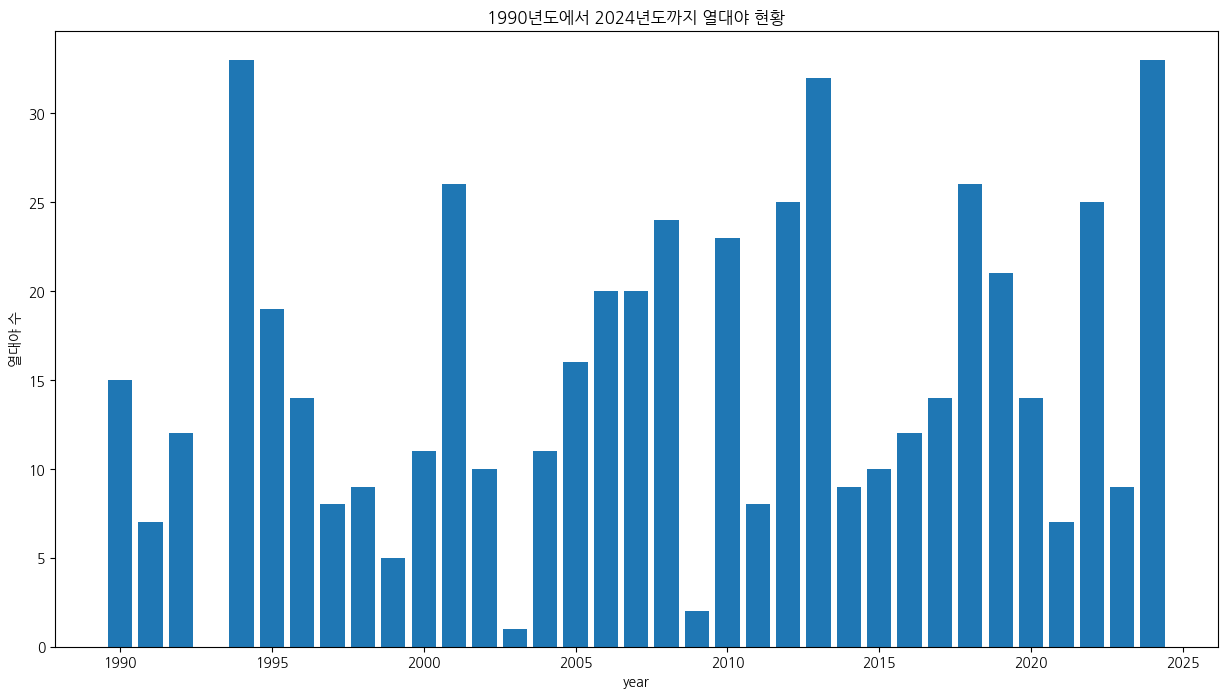

In [178]:
def main():
    
    # 파일 읽어오기
    data=pd.read_csv('../D0204/daegu-utf8.csv')
    
    # 날짜를 datetime으로 바꾸기
    data['날짜']=pd.to_datetime(data['날짜'],format='%Y-%m-%d')
    
    # 1990 ~ 2024년의 데이터 준비
    data1=data[(data['날짜'].dt.year>=1990) & (data['날짜'].dt.year<=2024)]
    
    # 각 년도의 열대야 횟수 계산
    data2=data1[data1['최저기온(℃)']>=25]
    c=data2['날짜'].dt.year.value_counts().sort_index().reset_index()
    c=pd.DataFrame(c)
    c.loc[len(c)] = [1993, 0]
    c['날짜']=c['날짜'].astype(int)
    c.set_index('날짜',inplace=True)
    c=c.sort_index()
    c=c.reset_index()
    

    # 연도별 열대야 횟수를 한 라인에 10개씩 출력
    num=1990
    for i in range(0,len(c)):
        counts=c.iloc[i,1]
        print(f'{1990+i}년 : {counts}회',end=' ')
        
        # 10이 되면 print()를 출력해서 한줄 띄워짐
        if(i+1)%10==0:
            print()
    
    # 연도별 열대야 횟수를 이용해서 막대 그래프 그리기

    xdata=c['날짜']
    ydata=c['count']
    
    plt.figure(figsize=(15, 8))
    plt.bar(xdata, ydata)
    plt.xlabel('year')
    plt.ylabel('열대야 수')
    plt.title('1990년도에서 2024년도까지 열대야 현황')
    
    plt.show()
    
            
main()